# Barplots of raw features

In [13]:
import pickle 
import numpy as np
from scipy.stats import sem
import matplotlib.pyplot as plt

In [25]:
with open('/sietch_colab/akapoor/Demographic_Inference/split_isolation_model_dadi_analysis_True_moments_analysis_True_momentsLD_analysis_True_seed_42/sims/sims_pretrain_500_sims_inference_1_seed_42_num_replicates_3_top_values_2/preprocessing_results_obj.pkl', 'rb') as f:
    preprocessing_results = pickle.load(f)

In [26]:
preprocessing_results['parameter_names']

['Na', 'N1', 'N2', 't_split']

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

def plot_mse_with_sem(preprocessing_results):
    """
    Calculate MSE for each analysis type and parameter, and create a grouped bar plot with SEM error bars.

    :param preprocessing_results: Dictionary containing predictions, targets, and parameter names.
    :return: A summary dictionary of MSE means and SEM values for each analysis and parameter.
    """
    # Extract necessary data
    parameter_names = preprocessing_results['parameter_names']  # E.g., ['Na', 'N1', 'N2', 't_split']
    training_predictions = preprocessing_results['training']['predictions']
    training_targets = preprocessing_results['training']['targets']

    # Define the analysis types present in the data
    analysis_types = ['dadi', 'moments', 'momentsLD']

    # Initialize a dictionary to store MSE values for each analysis and parameter
    mse_data = {analysis: {param: [] for param in parameter_names} for analysis in analysis_types}

    # Calculate MSE for each prediction column
    for column_name in training_predictions.columns:
        for analysis in analysis_types:
            if analysis in column_name:  # Check if the column belongs to the current analysis type
                for param in parameter_names:
                    if param in column_name:  # Check if the column corresponds to the parameter
                        # Extract predictions and the matching target
                        predictions = training_predictions[column_name]
                        target = training_targets[f'simulated_params_{param}']

                        # Calculate and store the MSE
                        mse = np.mean((predictions - target) ** 2)
                        mse_data[analysis][param].append(mse)

    # Compute the mean and SEM for MSEs across replicates
    mse_summary = {}
    for analysis, params in mse_data.items():
        mse_summary[analysis] = {
            param: (np.mean(mse_list), sem(mse_list))  # Mean and SEM for each parameter
            for param, mse_list in params.items()
        }

    # Prepare the grouped bar plot
    num_parameters = len(parameter_names)
    x_positions = np.arange(num_parameters)  # Positions for parameter groups
    bar_width = 0.25  # Width of each bar in the group

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, analysis in enumerate(analysis_types):
        # Extract means and SEM values for the current analysis
        means = [mse_summary[analysis][param][0] for param in parameter_names]
        errors = [mse_summary[analysis][param][1] for param in parameter_names]

        # Plot bars for the current analysis
        ax.bar(x_positions + i * bar_width, means, bar_width, label=analysis, yerr=errors, capsize=5)

    # Customize the plot
    ax.set_xticks(x_positions + bar_width * (len(analysis_types) - 1) / 2)
    ax.set_xticklabels(parameter_names)
    ax.set_xlabel('Parameters')
    ax.set_ylabel('Mean Squared Error (MSE)')
    ax.set_title('MSE for Each Analysis Type with SEM')
    ax.legend(title="Analysis Type")
    plt.tight_layout()
    plt.show()

    return mse_summary


/tmp/ipykernel_1497854/85066250.py:41: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  param: (np.mean(mse_list), sem(mse_list))  # Mean and SEM for each parameter


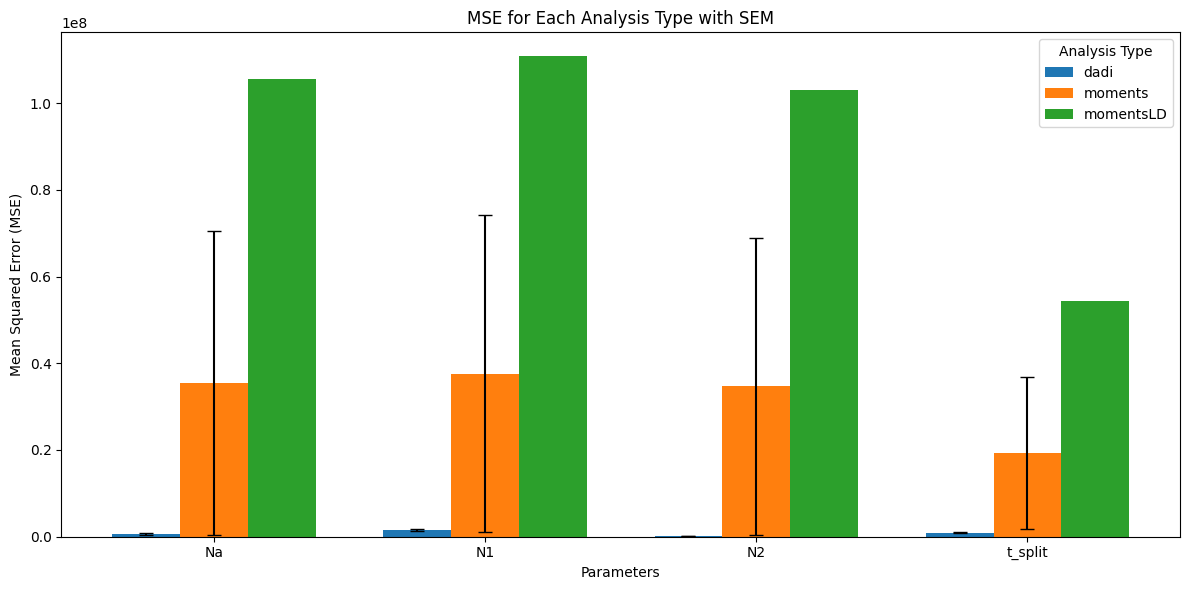

In [29]:
mse_summary = plot_mse_with_sem(preprocessing_results)

In [6]:
mse_summary

{'dadi': {'Na': (650969.5654907018, 255386.324666694),
  'N1': (1506379.2968321356, 325359.2963812702),
  'N2': (205067.66848372488, 13716.191415840993),
  't_split': (926498.0130485054, 59688.509572694195)},
 'moments': {'Na': (35434199.4130188, 35024043.076974824),
  'N1': (37601176.180686, 36602006.45144062),
  'N2': (34631655.4505914, 34184630.47651362),
  't_split': (19334566.065920886, 17498174.481519803)},
 'momentsLD': {'Na': (105481383.75736901, nan),
  'N1': (110805066.84332536, nan),
  'N2': (103000526.66521098, nan),
  't_split': (54326154.72203921, nan)}}

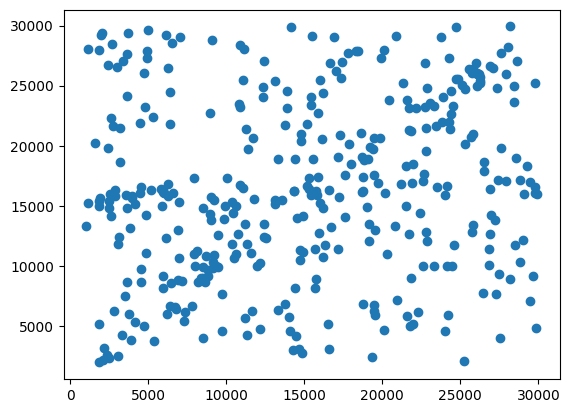

In [7]:
plt.figure()
plt.scatter(preprocessing_results['training']['targets']['simulated_params_Na'], preprocessing_results['training']['predictions']['momentsLD_Na'])
plt.show()

In [34]:
preprocessing_results['training']['predictions'].columns

Index(['dadi_rep1_Na', 'moments_rep1_Na', 'moments_rep1_FIM_element_0',
       'moments_rep1_FIM_element_1', 'moments_rep1_FIM_element_2',
       'moments_rep1_FIM_element_3', 'moments_rep1_FIM_element_4',
       'moments_rep1_FIM_element_5', 'moments_rep1_FIM_element_6',
       'moments_rep1_FIM_element_7', 'moments_rep1_FIM_element_8',
       'moments_rep1_FIM_element_9', 'dadi_rep1_N1', 'moments_rep1_N1',
       'dadi_rep1_N2', 'moments_rep1_N2', 'dadi_rep1_t_split',
       'moments_rep1_t_split', 'dadi_rep2_Na', 'moments_rep2_Na',
       'moments_rep2_FIM_element_0', 'moments_rep2_FIM_element_1',
       'moments_rep2_FIM_element_2', 'moments_rep2_FIM_element_3',
       'moments_rep2_FIM_element_4', 'moments_rep2_FIM_element_5',
       'moments_rep2_FIM_element_6', 'moments_rep2_FIM_element_7',
       'moments_rep2_FIM_element_8', 'moments_rep2_FIM_element_9',
       'dadi_rep2_N1', 'moments_rep2_N1', 'dadi_rep2_N2', 'moments_rep2_N2',
       'dadi_rep2_t_split', 'moments_rep2_t_spl